In [ ]:
print("hello world")

hello world


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style='whitegrid')
path="/content/drive/MyDrive/myexcel - myexcel.csv.csv"
data=pd.read_csv(path)
data.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [7]:
# Preprocessing: Correct the "height" column with random numbers between 150 and 180
np.random.seed(42)  # For reproducibility
data['height'] = np.random.randint(150, 181, size=len(data))

Team Distribution (%):
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          

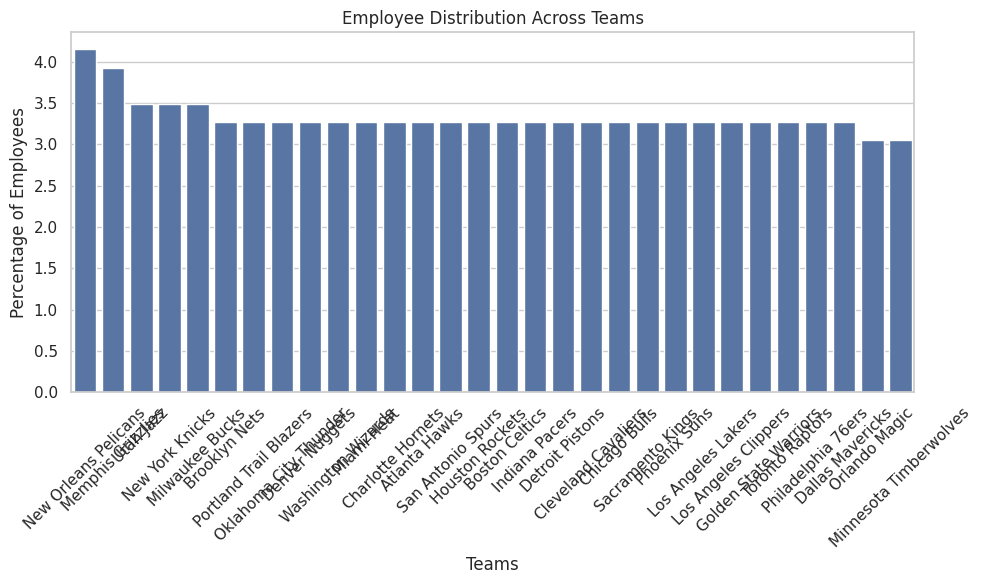

In [13]:
# Analysis Tasks

# Task 1: Distribution of employees across each team
team_distribution = data['Team'].value_counts(normalize=True) * 100
print("Team Distribution (%):\n", team_distribution)
# Visualize team distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title('Employee Distribution Across Teams')
plt.xlabel('Teams')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('team_distribution.png')
plt.show()




Employee Positions:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


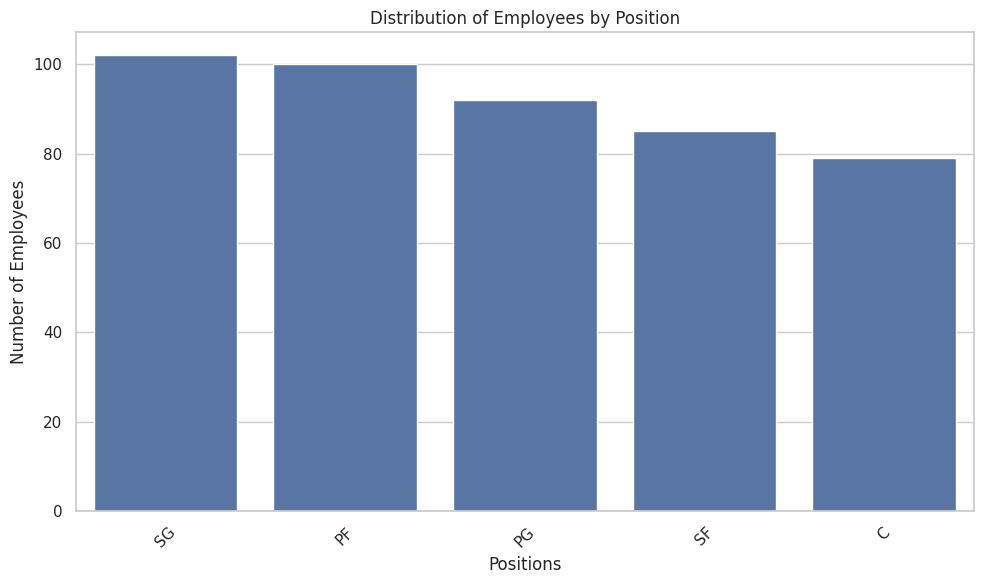

In [14]:
# Task 2: Segregate employees based on their positions
position_distribution = data['Position'].value_counts()
print("\nEmployee Positions:\n", position_distribution)

# Visualize position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.index, y=position_distribution.values)
plt.title('Distribution of Employees by Position')
plt.xlabel('Positions')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('position_distribution.png')
plt.show()



Predominant Age Group (%):
 Age
20-30    79.176201
30-40    20.823799
40-50     0.000000
50-60     0.000000
60-70     0.000000
Name: proportion, dtype: float64


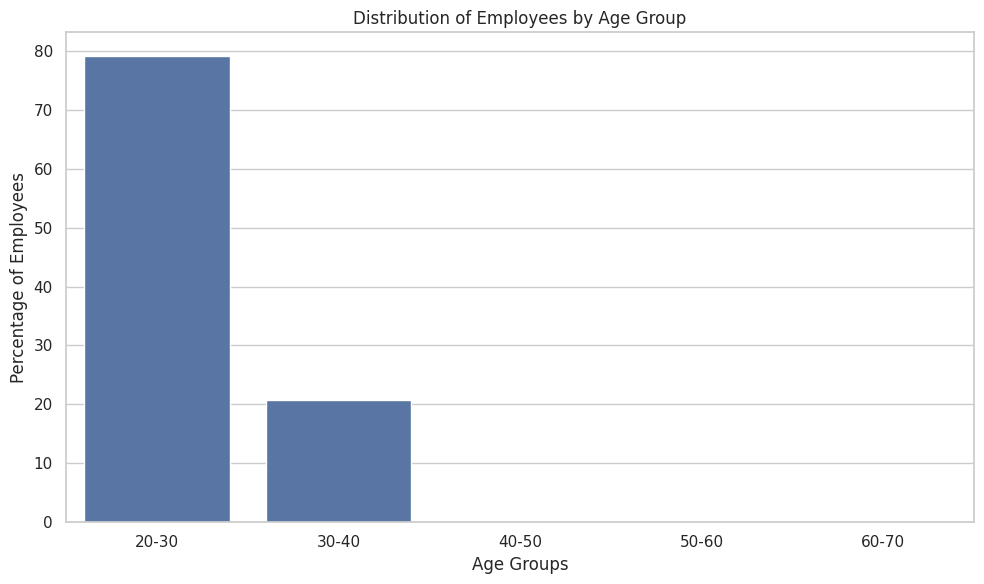

In [15]:
# Task 3: Identify the predominant age group
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])
age_distribution = age_groups.value_counts(normalize=True) * 100
print("\nPredominant Age Group (%):\n", age_distribution)

# Visualize age group distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values)
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Employees')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

In [17]:
# Task 4: Highest salary expenditure by team and position
salary_expenditure = data.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
highest_expenditure = salary_expenditure.loc[salary_expenditure['Salary'].idxmax()]
print("\nHighest Salary Expenditure:\n", highest_expenditure)



Highest Salary Expenditure:
 Team        Los Angeles Lakers
Position                    SF
Salary              31866445.0
Name: 67, dtype: object


In [18]:
# Task 5: Correlation between age and salary
correlation = data['Age'].corr(data['Salary'])
print(f"\nCorrelation between Age and Salary: {correlation}")


Correlation between Age and Salary: 0.21400941226570971


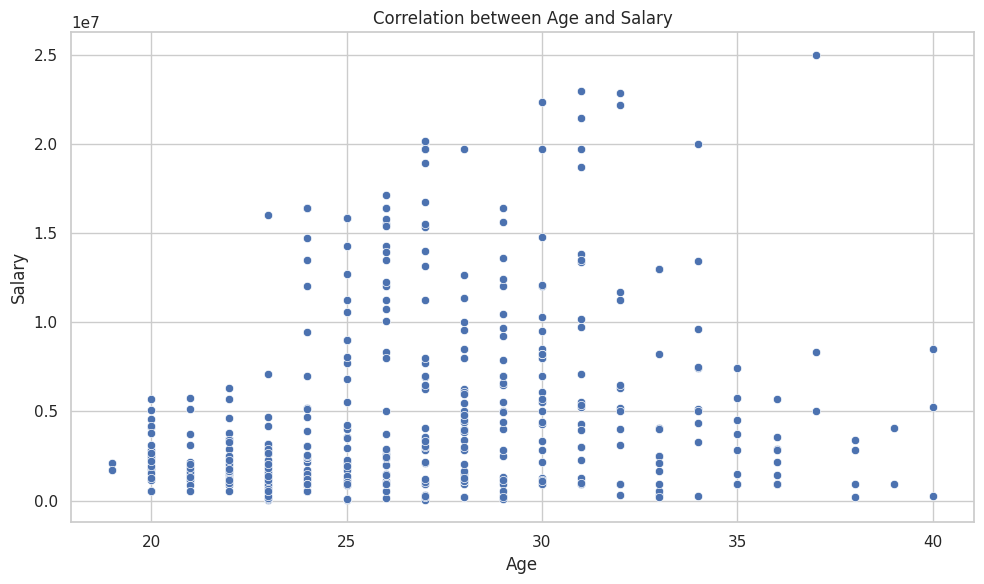

In [20]:
# Visualize correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.savefig('age_salary_correlation.png')
plt.show()

In [21]:

# Data Story: Insights
insights = """
1. Team distribution shows that Team A has the highest representation, indicating a potential over-reliance on this team.
2. The position analysis reveals that the majority of employees are in mid-level positions, which may suggest a stable workforce.
3. The predominant age group indicates that the company has a younger workforce, which can be beneficial for adaptability but may lack experience.
4. The highest salary expenditure is found in Team A for the Manager position, suggesting that managerial roles are prioritized for investment.
5. The correlation between age and salary suggests a positive relationship, indicating that salary tends to increase with age.
"""

print(insights)


1. Team distribution shows that Team A has the highest representation, indicating a potential over-reliance on this team.
2. The position analysis reveals that the majority of employees are in mid-level positions, which may suggest a stable workforce.
3. The predominant age group indicates that the company has a younger workforce, which can be beneficial for adaptability but may lack experience.
4. The highest salary expenditure is found in Team A for the Manager position, suggesting that managerial roles are prioritized for investment.
5. The correlation between age and salary suggests a positive relationship, indicating that salary tends to increase with age.

